In [1]:
from mcm import EcModel
reference= 'experiment'
rxnName = 'eclogitization_agu5_slb_rx'

In [2]:
phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# hacker median xenolith
mi0=[
    0.1470, # cpx
    0.2920, # opx
    0.0500, # quartz
    0.5560, # plag
    0.0, # garnet
    0.0, # kyanite
],

Xik0=[
    [0.59033, 0.30271, 0.04393,  0.00990, 0.05313], # di, hed, *cEn, *cats, jd
    [0.51220, 0.42014, 0.02807, 0.03959], # en, fs, *mgts, *oDi
    [1.], # quartz
    [0.59977, 0.40023], # an, ab
    [0.3, 0.3, 0.4, 0., 0.], # py, alm, gr, *mgmaj, *namaj
    [1.], # kyanite
],

[-5.58547374e-05  3.67773562e-03  0.00000000e+00 -2.47492410e-03
  7.30076613e-02  5.17864436e-05 -1.77269605e-02 -4.40772601e-03
  0.00000000e+00  2.28564654e-02 -5.35008059e-03 -9.47086722e-02
  2.89240693e-03  1.98341644e-02  2.40399801e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


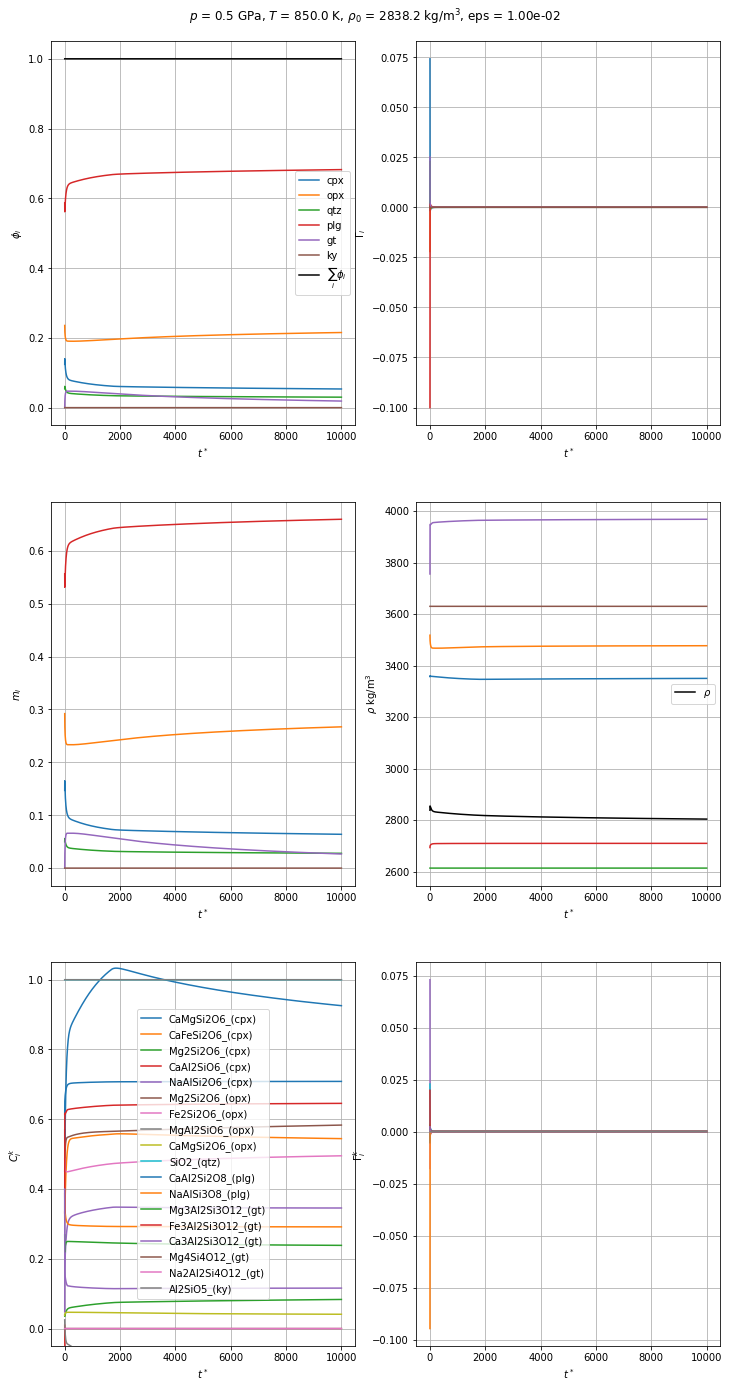

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.147000,0.292000,0.050000,0.556000,0.000000,0.000000e+00
Wt% (final),0.063895,0.267033,0.027966,0.659447,0.026658,2.915138e-16


In [3]:
import numpy as np

Ps = np.linspace(0.5,2.5,100)
Ts = np.linspace(850.,1100.,100)

densities = np.zeros_like(Ps)

model = EcModel(
    reference,
    rxnName,
    domain="profile",
    mi0=[
        0.1470, # cpx
        0.2920, # opx
        0.0500, # quartz
        0.5560, # plag
        0.0, # garnet
        0.0, # kyanite
    ],
    #Pl     ab: 0.40023, an: 0.59977
    #Cpx    jd: 0.05313, di: 0.59033, hed: 0.30271, cen: 0.04393, cts: 0.00990
    #Opx    odi: 0.03959, en: 0.51220, fs: 0.42014, ts: 0.02807
    Xik0=[
        [0.59033, 0.30271, 0.04393,  0.00990, 0.05313], # di, hed, *cEn, *cats, jd
        [0.51220, 0.42014, 0.02807, 0.03959], # en, fs, *mgts, *oDi
        [1.], # quartz
        [0.59977, 0.40023], # an, ab
        [0.3, 0.3, 0.4, 0., 0.], # py, alm, gr, *mgmaj, *namaj
        [1.], # kyanite
    ],
    P0=Ps[0],
    T0=Ts[0],
    nP=0,
    nT=0
)


model.run(end_t=1e4)

# get "equilibrated" composition
mi1 = model.mi_final()
Cik1 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]

# run the model with this starting composition
for i, P in enumerate (Ps):
    T = Ts[i]
    # get next composition
    mi1 = model.mi_final()
    Cik1 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]
    model = EcModel(
        reference,
        rxnName,
        mi0=mi1,
        Cik0=Cik1,
        nP=0,
        nT=0,
        T0=T,
        P0=P,
    )
    model.run(end_t=1,plot=False)
    rho = model.ode.final_rho()
    densities[i] = rho

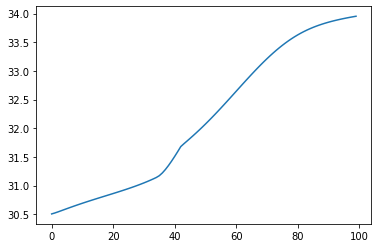

../database/install/eclogitization_agu3_slb_rx/lib/python3.8/site-packages/
[0.24921897 0.28551903 0.         0.         0.465262   0.43211501
 0.56788499 0.         0.         1.         0.26125922 0.73874078
 0.35798321 0.44201253 0.20000426 0.         0.         1.        ]

[0.09, 0.24, 0.08, 0.51, 0.0, 0.07]
0.99
2.0122561440002755
(array(['Clinopyroxene_slb_ph', 'Quartz_slb_ph', 'Feldspar_slb_ph',
       'Garnet_slb_ph', 'Kyanite_slb_ph'], dtype='<U20'), array(['cpx', 'qtz', 'plg', 'gt', 'ky'], dtype='<U3'))


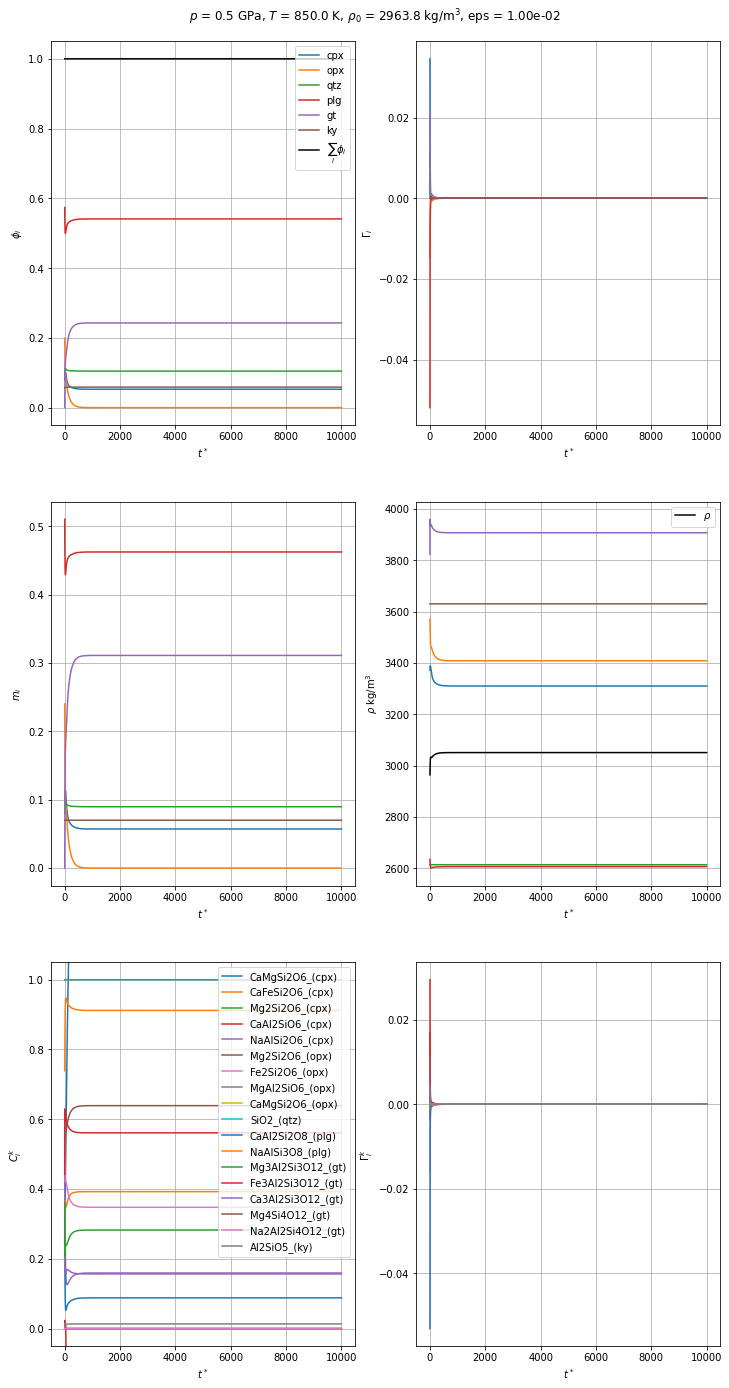

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Mode (initial),0.090000,2.400000e-01,0.080000,0.51000,0.000000,0.07
Mode (final),0.057169,2.774836e-11,0.089714,0.46219,0.310928,0.07


../database/install/eclogitization_agu3_slb_rx/lib/python3.8/site-packages/
[1.54467855932432, 0.39249584725302106, 1.8533839555363728e-19, -1.0965029118487755, 0.15932850527142953, 0.6390339738086179, 0.347658964772588, 0.013307061418791129, 0.0, 1.0, 0.0880377298636068, 0.9119622701363949, 0.2823777459329378, 0.5610487862955845, 0.15657346777147807, 0.0, 0.0, 1.0]

[5.71685703e-02 2.77483632e-11 8.97137284e-02 4.62189823e-01
 3.10927878e-01 7.00000000e-02]
0.9900000000000004
0.05701303000023472
(array(['Clinopyroxene_slb_ph', 'Quartz_slb_ph', 'Feldspar_slb_ph',
       'Garnet_slb_ph', 'Kyanite_slb_ph'], dtype='<U20'), array(['cpx', 'qtz', 'plg', 'gt', 'ky'], dtype='<U3'))
../database/install/eclogitization_agu3_slb_rx/lib/python3.8/site-packages/
[1.5446095148829035, 0.39248109134726045, 1.8875586672987441e-19, -1.0964129698449416, 0.15932236361477298, 0.6390340647390165, 0.3476590143713205, 0.013306920889659644, 0.0, 1.0, 0.08803303070559663, 0.9119669692944053, 0.2823781452283803, 

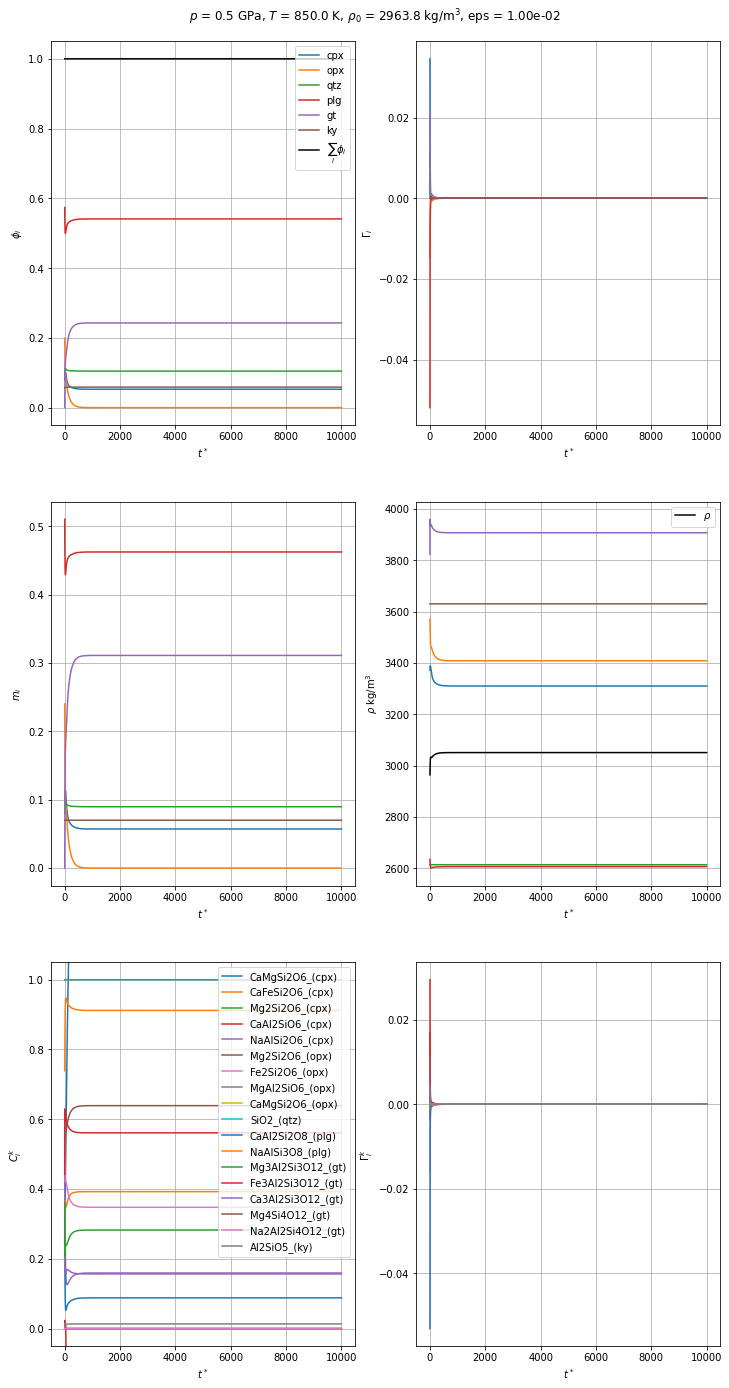

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Mode (initial),0.090000,2.400000e-01,0.080000,0.51000,0.000000,0.07
Mode (final),0.057169,2.774836e-11,0.089714,0.46219,0.310928,0.07


../database/install/eclogitization_agu3_slb_rx/lib/python3.8/site-packages/
[1.54467855932432, 0.39249584725302106, 1.8533839555363728e-19, -1.0965029118487755, 0.15932850527142953, 0.6390339738086179, 0.347658964772588, 0.013307061418791129, 0.0, 1.0, 0.0880377298636068, 0.9119622701363949, 0.2823777459329378, 0.5610487862955845, 0.15657346777147807, 0.0, 0.0, 1.0]

[5.71685703e-02 2.77483632e-11 8.97137284e-02 4.62189823e-01
 3.10927878e-01 7.00000000e-02]
0.9900000000000004
0.08781548499973724
(array(['Clinopyroxene_slb_ph', 'Quartz_slb_ph', 'Feldspar_slb_ph',
       'Garnet_slb_ph', 'Kyanite_slb_ph'], dtype='<U20'), array(['cpx', 'qtz', 'plg', 'gt', 'ky'], dtype='<U3'))
../database/install/eclogitization_agu3_slb_rx/lib/python3.8/site-packages/
[1.5446139661017686, 0.392481565824707, 1.8895668784992353e-19, -1.0964182213212932, 0.15932268939481342, 0.639034068263481, 0.34765901724782006, 0.013306914488695868, 0.0, 1.0, 0.08803344684969426, 0.9119665531503075, 0.2823780805010643, 0.

In [11]:
densities10 = np.zeros_like(Ps)
densities100 = np.zeros_like(Ps)

# "Equilibirate" the model to start out
model = EcModel(
    reference,
    rxnName,
    mi0=mi0,
    Xik0=Xik0,
    nP=0,
    nT=0,
    T0=Ts[0], # granulite facies
    P0=Ps[0] # granulite facies
)
model.run(end_t=1e4)

# get "equilibrated" composition
mi1 = model.mi_final()
Cik1 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]

# run the model with this starting composition
for i, P in enumerate (Ps):
    T = Ts[i]
    # get next composition
    mi1 = model.mi_final()
    Cik1 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]
    model = EcModel(
        reference,
        rxnName,
        mi0=mi1,
        Cik0=Cik1,
        nP=0,
        nT=0,
        T0=T,
        P0=P,
    )
    model.run(end_t=10,plot=False)
    rho = model.ode.final_rho()
    densities10[i] = rho

# "Equilibirate" the model to start out
model = EcModel(
    reference,
    rxnName,
    mi0=mi0,
    Xik0=Xik0,
    nP=0,
    nT=0,
    T0=Ts[0], # granulite facies
    P0=Ps[0] # granulite facies
)
model.run(end_t=1e4)

# get "equilibrated" composition
mi1 = model.mi_final()
Cik1 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]

# run the model with this starting composition
for i, P in enumerate (Ps):
    T = Ts[i]
    # get next composition
    mi1 = model.mi_final()
    Cik1 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]
    model = EcModel(
        reference,
        rxnName,
        mi0=mi1,
        Cik0=Cik1,
        nP=0,
        nT=0,
        T0=T,
        P0=P,
    )
    model.run(end_t=100,plot=False)
    rho = model.ode.final_rho()
    densities100[i] = rho

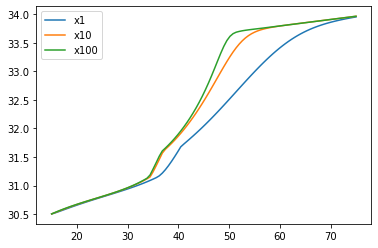

In [16]:
import matplotlib as mpl
from  matplotlib import pyplot as plt

plt.plot(Ps*30.,densities)
plt.plot(Ps*30.,densities10)
plt.plot(Ps*30.,densities100)
plt.legend(["x1","x10","x100"])

In [16]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))
import numpy as np
from tcg_slb.phasediagram.scipy import ScipyPDReactiveODE
from mcm import EcModel as M

phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# mass fractions of the phases


# hacker median xenolith
mi0=[
    0.1470, # cpx
    0.2920, # opx
    0.0500, # quartz
    0.5560, # plag
    0.0, # garnet
    0.0, # kyanite
]

Xik0=[
    [0.59033, 0.30271, 0.04393,  0.00990, 0.05313], # di, hed, *cEn, *cats, jd
    [0.51220, 0.42014, 0.02807, 0.03959], # en, fs, *mgts, *oDi
    [1.], # quartz
    [0.59977, 0.40023], # an, ab
    [0.3, 0.3, 0.4, 0., 0.], # py, alm, gr, *mgmaj, *namaj
    [1.], # kyanite
]

n_points = 50
Ps = np.append(np.linspace(1.0,2.25,n_points), np.ones(n_points)*2.25)
Ts = np.append(np.linspace(1000.,800.,n_points), np.linspace(800.,900.,n_points))
t = np.arange(len(Ps))
print(t)

# "equilibirate" the model to start out
model = EcModel(
    reference,
    rxnName,
    mi0=mi0,
    Xik0=Xik0,
    nP=0,
    nT=0,
    Tmin=Ts[0],
    Tmax=Ts[-1],
    Pmin=Ps[0],
    Pmax=Ps[-1],
    T0=Ts[0], # granulite facies
    P0=Ps[0] # granulite facies
)

model.run(end_t=1e5, plot=False)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


(<py_eclogitization_agu5_slb_rx.eclogitization_agu5_slb_rx at 0x7feb8da67bf0>,
 None,
 None)

In [17]:
from multiprocessing import Pool

GPa2bar = 1.e4

Das = [0.1, 0.3, 1, 3, 10., 30., 100., 1000.]

mi0 = model.mi_final()
Cik0 = [c for arr in model.ode.reshapeC(model.ode.sol.y[model.ode.I:model.ode.I+model.ode.K,-1]) for c in arr]

# function to run in parallel
def scenario(Da):
    mi = mi0
    Cik = Cik0
    density = np.zeros_like(Ps)
    ode = ScipyPDReactiveODE(rxn)

    # do the calculation
    print("Da={} starting...\n".format(Da))
    for i, P in enumerate(Ps):
        t_end = 1.
        ode.solve(Ts[i], P*GPa2bar, mi, Cik, t_end, Da=Da)

        density[i] = ode.final_rho()
        # update the compositions for next timestep
        mi = ode.sol.y[:ode.I,-1]
        Cik = [c for arr in ode.reshapeC(ode.sol.y[ode.I:ode.I+ode.K,-1]) for c in arr]

    print("Da={} finished.".format(Da))
    return density

with Pool(len(Das)) as p:
    densities = p.map(scenario, Das)

Da=0.3 starting...
Da=3 starting...
Da=0.1 starting...
Da=30.0 starting...
Da=10.0 starting...
Da=1 starting...
Da=1000.0 starting...
Da=100.0 starting...








Da=0.1 finished.
Da=0.3 finished.
Da=1 finished.
Da=3 finished.
Da=10.0 finished.
Da=30.0 finished.
Da=100.0 finished.
Da=1000.0 finished.


Text(0, 0.5, 'density')

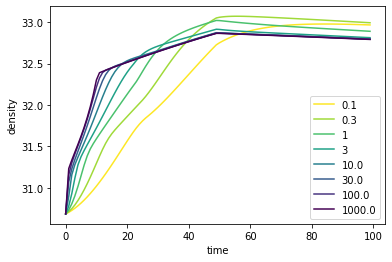

In [18]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.pylab as pl

colors = pl.cm.viridis_r(np.linspace(0,1,len(densities)))

for i in range(len(densities)):
    plt.plot(t,densities[i], color=colors[i])

plt.legend(Das)
plt.xlabel("time")
plt.ylabel("density")

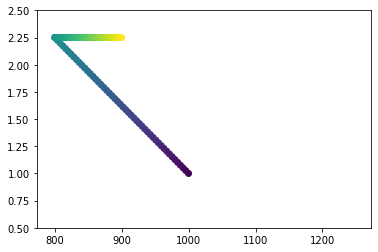

In [19]:
plt.scatter(Ts,Ps,c=t)
plt.xlim([773,1273])
plt.ylim([0.5, 2.5])